# Deep learning from scratch: homework 2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset we [we saw in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_3_logistic_regression.slides.html#/14/1) to test out your code.  This dataset is in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [2]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from autograd import grad

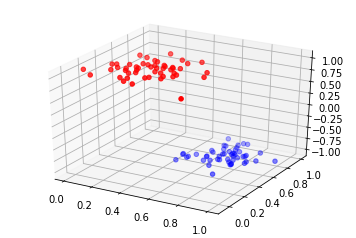

In [129]:
csvname = '3d_classification_data_v2.csv'
data = np.loadtxt(csvname,delimiter = ',')
plt.close('all')
fig=plt.figure()
ax = fig.add_subplot(111,projection = '3d')
color_label = ['r']*len(data[:,2])
for i in range(len(data[:,2])):
    if data[i,2] == -1:
        color_label[i] = 'b'
ax.scatter(data[:,0],data[:,1],data[:,2],c = color_label)
plt.show()

In [120]:
x = data[:,0:2]
x = x.T
y = data[:,-1]

G = 500
def my_exp(x, G):
    return np.exp(x) if x.all()<G else np.exp(G)

def multiclass_softmax(W):
    # pre-compute predictions on all points
    all_evals = W[0,:] + np.dot(x.T,W[1:,:])
    # compute counting cost
    cost = 0
    for p in range(len(y)):
        # convert class 1, -1 to 0, 1
        if y[p] == 1:
            y_p = 0
        else:
            y_p = 1
        
        cost += np.log(np.sum(my_exp(all_evals[p,:], G) - all_evals[p,y_p]))
    return cost + lam*np.linalg.norm(W[1:,:],'fro')**2

def count_misclass(w):
    count = 0
    all_evals = w[0,:] + np.dot(x.T,w[1:,:])
    for p in range(len(y)):
        if all_evals[p][0] >= all_evals[p][1]:
        # classified as class 1
            if y[p] == -1:
                count += 1
        else:
            if y[p] == 1:
                count += 1
    return count
# gradient descent function for vector-form weights
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of the input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    weight_history = np.empty([max_its + 1,w.shape[0],w.shape[1]])
    weight_history[0] = w
    all_evals = w[0,:] + np.dot(x.T,w[1:,:])
    test_eval = [best_eval]
    mis_num = [count_misclass(w)]
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        weight_history[k+1] = w
            
        # return only the weight providing the lowest evaluation
        test_eval.append(g(w))
        if test_eval[k+1] < best_eval:
            best_eval = test_eval[k+1]
            best_w = w
            
        # count the misclassification numbers    
        if plot_misclass == 1:
            mis_num.append(count_misclass(w))
    if plot_cost == 1:
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
        its = range(len(test_eval))
        ax2.plot(its,test_eval)
        ax2.legend(['cost'])
    if plot_misclass == 1:
        ax1.plot(its,mis_num)
        ax1.legend(['misclassifications'])
    plt.show()        
    return weight_history

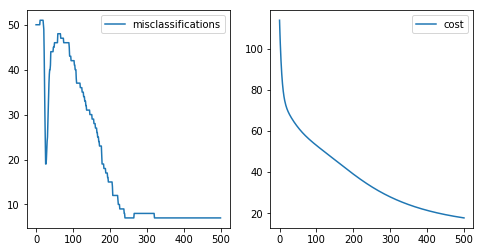

In [123]:
# initialize weights
N = len(x)    #first
C = 2    # class number
W = np.random.random((N+1,C))

alpha = 10**-3
max_iter = 500
lam = 10**-3    # lambda in unnormalized weights
plot_cost = 1
plot_misclass = 1

plt.close('all')
w_history = gradient_descent(multiclass_softmax,alpha = alpha, max_its = max_iter, w = W)



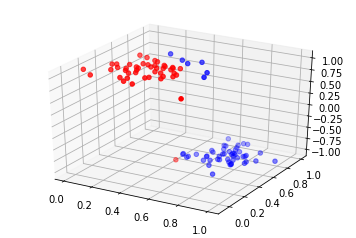

In [132]:
w_f = w_history[-1,:]
all_evals = w_f[0,:] + np.dot(x.T,w_f[1:,:])
y_ = np.argmax(all_evals,1)
y_ = -(y_-0.5)*2

plt.close('all')
fig=plt.figure()
ax = fig.add_subplot(111,projection = '3d')
color_label = ['r']*len(data[:,2])
for i in range(len(data[:,2])):
    if y_[i] == -1:
        color_label[i] = 'b'
ax.scatter(data[:,0],data[:,1],data[:,2],c = color_label)
plt.show()


#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [ ]:
csvname = 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,0:8]
x = x.T
y = data[:,-1]

y_01 = (y+1)/2
y_01 = y_01.astype(np.int64)

def multiclass_softmax(W):
    # pre-compute predictions on all points
    all_evals = W[0,:] + np.dot(x.T,W[1:,:])
    # compute counting cost
    cost = 0
    for p in range(len(y)):
        y_p = y_01[p]
        
        cost += np.log(np.sum(my_exp(all_evals[p,:], G) - all_evals[p,y_p]))
    return cost + lam*np.linalg.norm(W[1:,:],'fro')**2

def count_misclass(w):
    all_evals = w[0,:] + np.dot(x.T,w[1:,:])
    y_ = np.argmax(all_evals,1)
    count = np.sum(np.absolute(y_-y_01))
    return count

# gradient descent function for vector-form weights
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of the input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    # weight_history = np.empty([max_its + 1,w.shape[0],w.shape[1]])
    # weight_history[0] = w
    # all_evals = w[0,:] + np.dot(x.T,w[1:,:])
    test_eval = [best_eval]
    mis_num = [count_misclass(w)]
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        # weight_history[k+1] = w
            
        # return only the weight providing the lowest evaluation
        test_eval.append(g(w))
        if test_eval[k+1] < best_eval:
            best_eval = test_eval[k+1]
            best_w = w
            
        # count the misclassification numbers    
        mis_num.append(count_misclass(w))
        if mis_num[k+1] < 30:
            break
    if plot_cost == 1:
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
        its = range(len(test_eval))
        ax2.plot(its,test_eval)
        ax2.legend(['cost'])
    if plot_misclass == 1:
        ax1.plot(its,mis_num)
        ax1.legend(['misclassifications'])
    plt.show()        
    return w


# initialize weights
N = len(x)    #first
C = 2    # class number
W = np.random.random((N+1,C))

alpha = 1*10**-5
max_iter = 1000
lam = 10**-3    # lambda in unnormalized weights
plot_cost = 1
plot_misclass = 1

plt.close('all')
# run gradient descent
w_f = gradient_descent(multiclass_softmax,alpha = alpha, max_its = max_iter, w = W)

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset we saw [in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_5_one_versus_all.slides.html#/) - located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

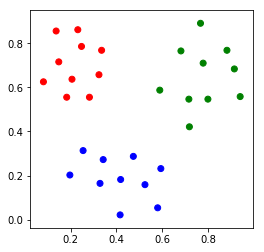

In [3]:
# import data
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,0:2]
x = x.T
y = data[:,-1]
color_label = ['r']*len(y)
for p in range(len(y)):
    if y[p] == 2:
        color_label[p] = 'g'
    elif y[p] == 3:
        color_label[p] = 'b'
plt.close('all')
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(x[0,:],x[1,:],c = color_label)
plt.show()



In [16]:
# create pseudo-labels
y1 = []
for i in range(len(y)):
    if y[i] == 1:
        y1.append(1)
    else:
        y1.append(-1)
        
y2 = []
for i in range(len(y)):
    if y[i] == 2:
        y2.append(1)
    else:
        y2.append(-1)
y3 = []
for i in range(len(y)):
    if y[i] == 3:
        y3.append(1)
    else:
        y3.append(-1)

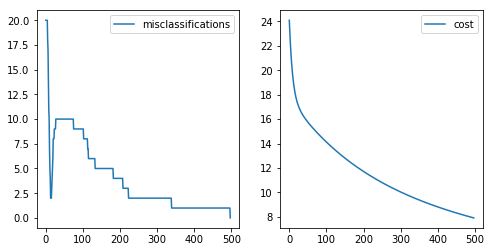

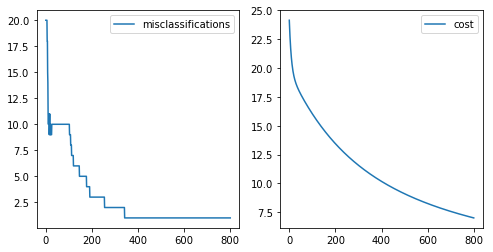

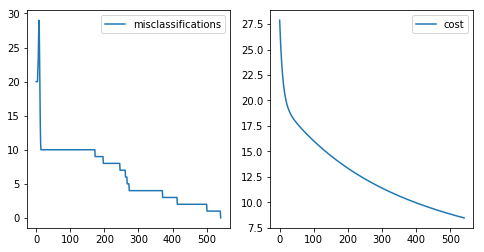

[[-0.11405996 -0.78759334  0.60554691]
 [-0.59983216  0.75968695  0.25115157]
 [ 0.31562285 -0.07562019 -0.94586669]]


In [42]:
# break the problem into 3 subproblems.
from numpy import linalg as LA

# my exp function
G = 500
def my_exp(x, G):
    return np.exp(x) if x.all()<G else np.exp(G)

def multiclass_softmax(W, y_ref):
    # pre-compute predictions on all points
    all_evals = W[0,:] + np.dot(x.T,W[1:,:])
    # compute counting cost
    cost = 0
    for p in range(len(y_ref)):
        y_p = int(y_ref[p])
        cost += np.log(1 + my_exp(-y_p*all_evals[p,:],G))
    return cost + lam*np.linalg.norm(W[1:,:],'fro')**2

def count_misclass(w,y_ref):
    y_ref = np.asarray([y_ref])
    all_evals = w[0,:] + np.dot(x.T,w[1:,:])
    y_ = -all_evals.T*y_ref
    y_ = y_.clip(0)
    count = np.count_nonzero(y_)
    return count

# gradient descent function for vector-form weights
def gradient_descent(g,alpha,max_its,w,y_ref):
    # compute the gradient of the input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w,y_ref)       # lowest evaluation yet
    # weight_history = np.empty([max_its + 1,w.shape[0],w.shape[1]])
    # weight_history[0] = w
    # all_evals = w[0,:] + np.dot(x.T,w[1:,:])
    test_eval = [best_eval]
    mis_num = [count_misclass(w,y_ref)]
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w,y_ref)

        # take gradient descent step
        w = w - alpha*grad_eval

        # count the misclassification numbers    
        mis_num.append(count_misclass(w,y_ref)) 
        if mis_num[k+1] == 0:
            break
        # return only the weight providing the lowest evaluation
        test_eval.append(g(w,y_ref))
        if mis_num[k+1] < mis_num[0]:
            best_w = w
  
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
    if plot_cost == 1:
        its = range(len(test_eval))
        ax2.plot(its,test_eval)
        ax2.legend(['cost'])
    if plot_misclass == 1:
        its = range(len(mis_num))
        ax1.plot(its,mis_num)
        ax1.legend(['misclassifications'])
    plt.show()        
    return best_w

plot_cost = 1
plot_misclass = 1
lam = 10**-4    # lambda in unnormalized weights
def run_multiclass():
    # initialize weights
    N = len(x)    #first
    W = np.random.random((N+1,1))

    alpha = 5*10**-3
    max_iter = 800
    
    plt.close('all')
    # run gradient descent
    w_1 = gradient_descent(multiclass_softmax,alpha = alpha, max_its = max_iter, w = W, y_ref = y1)
    w_2 = gradient_descent(multiclass_softmax,alpha = alpha, max_its = max_iter, w = W, y_ref = y2)
    w_3 = gradient_descent(multiclass_softmax,alpha = alpha, max_its = max_iter, w = W, y_ref = y3)
    
    # normalization
    w_1 = w_1/LA.norm(w_1)
    w_2 = w_2/LA.norm(w_2)
    w_3 = w_3/LA.norm(w_3)
    w = np.array([w_1[:,0], w_2[:,0], w_3[:,0]])
    return w
w_f = run_multiclass()
print(w_f)

In [44]:
# good weights:
w_good = np.array([-0.11405996, -0.78759334,  0.60554691,
 -0.59983216,  0.75968695,  0.25115157,
 0.31562285, -0.07562019, -0.94586669])
w_good = w_good.reshape(3,3)


In [43]:
w_ = w_good.T
all_evals = w_[0,:] + np.dot(x.T,w_[1:,:])
y_est = np.argmax(all_evals,1) + 1
print(y_est)

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

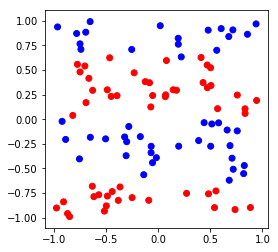

In [53]:
# import data
csvname = 'bricks.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,0:2]
x = x.T
y = data[:,-1]
color_label = ['r']*len(y)
for p in range(len(y)):
    if y[p] == -1:
        color_label[p] = 'b'
plt.close('all')
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(x[0,:],x[1,:],c = color_label)
plt.show()

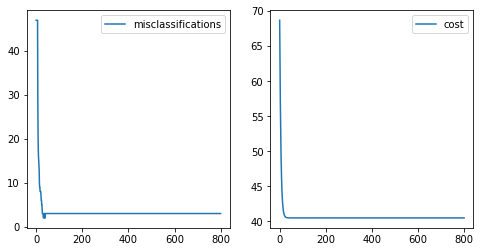

In [86]:
# use f(x2) = w0 + w1*sin(w2*x2)
def predict(x_,w):
    val = w[0] + np.sin(w[1]*x_)
    return val

# softmax cost
def softmax(w):
    cost = 0
    for p in range(len(y)):
        x_p = x[1,p]
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*predict(x_p,w)))
    return cost

def count_misclass(w):
    y_ref = np.asarray([y])
    all_evals = w[0] + np.sin(w[1]*x[1,:])
    y_ = -all_evals.T*y_ref
    y_ = y_.clip(0)
    count = np.count_nonzero(y_)
    return count

# gradient descent function for vector-form weights
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of the input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    test_eval = [best_eval]
    mis_num = [count_misclass(w)]
    best_mis_num = mis_num[0]
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # count the misclassification numbers    
        mis_num.append(count_misclass(w))
        test_eval.append(g(w))
        if mis_num[k+1] < best_mis_num:
            best_w = w
            best_mis_num = mis_num[k+1]
            
    if plot_cost == 1:
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
        its = range(len(test_eval))
        ax2.plot(its,test_eval)
        ax2.legend(['cost'])
    if plot_misclass == 1:
        its = range(len(mis_num))
        ax1.plot(its,mis_num)
        ax1.legend(['misclassifications'])
    plt.show()        
    return best_w

# initialize weights
W = 10*np.random.random((2,1))

alpha = 5*10**-3
max_iter = 800
plot_cost = 1
plot_misclass = 1

plt.close('all')
# run gradient descent
w_f = gradient_descent(softmax,alpha = alpha, max_its = max_iter, w = W)

In [87]:
evals = w_f[0] + np.sin(w_f[1]*x[1,:])
y_est = []
for i in range(len(evals)):
    if evals[i] >=0:
        y_est.append(1)
    else:
        y_est.append(-1)
print(y_est - y)
print(w_f)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.14206619]
 [ 5.19185833]]


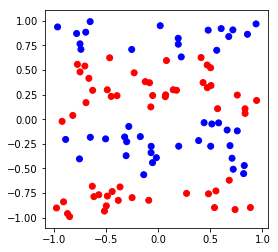

In [88]:
color_label = ['r']*len(y)
for p in range(len(y)):
    if y_est[p] == -1:
        color_label[p] = 'b'
plt.close('all')
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(x[0,:],x[1,:],c = color_label)
plt.show()